In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

try:
    folder_path = r"C:\Users\pc\Desktop\Data coll\Week 1\yfinance_data"
    print("Correct path")
except:
  print("try again")   
   
# List of stock files
stock_files = ["AAPL_historical_data.csv", "AMZN_historical_data.csv", "GOOG_historical_data.csv", "MSFT_historical_data.csv", "NVDA_historical_data.csv", "TSLA_historical_data.csv"]

# Dictionary to hold each stock's data
stock_data = {}

for file in stock_files:
    stock_name = file.split(".")[0]
    file_path = os.path.join(data_dir, file)

    # Load and preprocess
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    
    stock_data[stock_name] = df

# Show sample data
stock_data["AAPL_historical_data"].head()

Correct path


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [13]:
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator

#Adding indicator
df['SMA_20'] = SMAIndicator(close=df['Close'], window=20).sma_indicator()
df['RSI'] = RSIIndicator(close=df['Close'], window=14).rsi()

macd = MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()

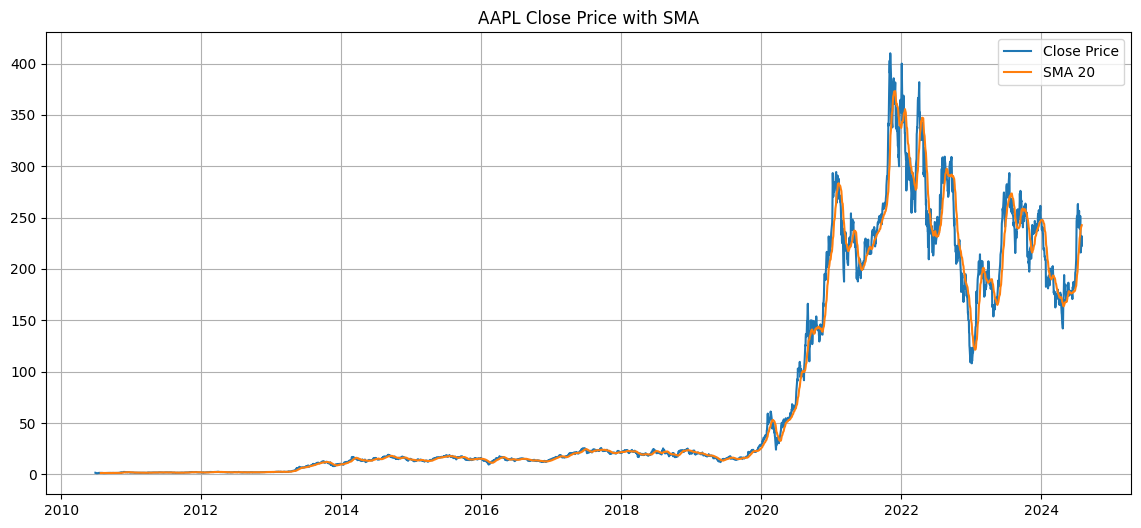

,MACD,MACD_signal
Date,,
2024-07-24,11.789291,15.873789
2024-07-25,9.353206,14.569672
2024-07-26,7.302106,13.116159
2024-07-29,6.593101,11.811547
2024-07-30,5.206237,10.490485


In [18]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='SMA 20')
plt.title("AAPL Close Price with SMA")
plt.legend()
plt.grid()
plt.show()

# View the MACD section
df[['MACD', 'MACD_signal']].tail()